In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

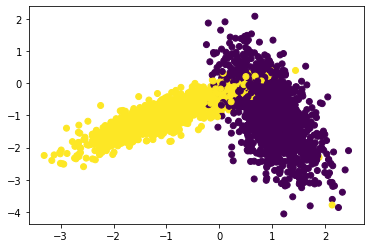

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def RandomSearchCV(x_train, y_train, classifier, param_range, folds):
  # generate 10 random integers from unif distribution
    params = list(set(filter(lambda x: x % 2 != 0, np.random.randint(param_range[0], param_range[1], 1000))))[:10]
    train_accuracy = []
    cv_accuracy = []
    for k in tqdm(params):
        train_scores_folds = []
        test_cv_scores_folds  = []
        equal_parts = int(len(x_train)/folds)
        test_cv_ind_low = 0
        test_cv_ind_high = equal_parts
        for j in range(folds):
            test_cv_indices = [x for x in range(test_cv_ind_low, test_cv_ind_high)]
            train_indices = list(set(list(range(len(x_train))))- set(test_cv_indices))
            # set up cv and train data sets from x_train
            X_test_cv = x_train[test_cv_indices]
            Y_test_cv = y_train[test_cv_indices]
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            test_cv_ind_low = test_cv_ind_high
            # initialize and train the model
            classifier.n_neighbors = k
            classifier.fit(X_train, Y_train)
            # prediction on CV
            Y_pred = classifier.predict(X_test_cv)
            test_cv_scores_folds.append(accuracy_score(Y_test_cv, Y_pred))
            # prediction on train set
            Y_predicted = classifier.predict(X_train)
            train_scores_folds.append(accuracy_score(Y_train, Y_predicted))
            if (j != folds-2):
                test_cv_ind_high = test_cv_ind_low + equal_parts
            else:
                test_cv_ind_high = len(x_train)    
        train_accuracy.append(np.mean(np.array(train_scores_folds)))
        cv_accuracy.append(np.mean(np.array(test_cv_scores_folds)))       
    return train_accuracy, cv_accuracy, params    

100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

params [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
train_score_3_fold [1.0, 0.968, 0.9624666666666667, 0.9608, 0.9608666666666666, 0.9596666666666667, 0.9592, 0.9589333333333334, 0.9575333333333335, 0.9571333333333333]
test_score_3_fold [0.9296000000000001, 0.9464, 0.9495999999999999, 0.9518666666666666, 0.9529333333333333, 0.9540000000000001, 0.9544, 0.9540000000000001, 0.9545333333333333, 0.9541333333333334]


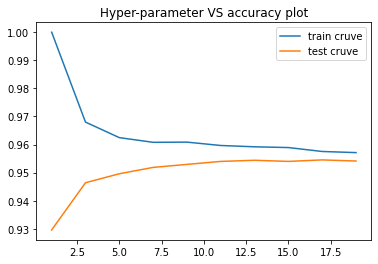

In [5]:
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()
param_range = (1,51)
folds = 3

train_score_3_fold , test_score_3_fold, params = RandomSearchCV(X_train, y_train, neigh, param_range, folds)
print('params', params)
print('train_score_3_fold', train_score_3_fold)
print('test_score_3_fold', test_score_3_fold)
plt.plot(params, train_score_3_fold, label='train cruve')
plt.plot(params, test_score_3_fold, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

100%|██████████| 10/10 [00:20<00:00,  2.08s/it]

params [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
train_score_10_fold [0.9669481481481481, 0.9621925925925925, 0.9609185185185185, 0.96, 0.9595407407407407, 0.9581037037037035, 0.9578962962962964, 0.9580148148148148, 0.9576, 0.9572296296296295]
test_score_10_fold [0.9471999999999999, 0.9511999999999998, 0.9527999999999999, 0.954, 0.954, 0.9547999999999999, 0.9557333333333332, 0.9555999999999999, 0.9546666666666667, 0.9557333333333332]


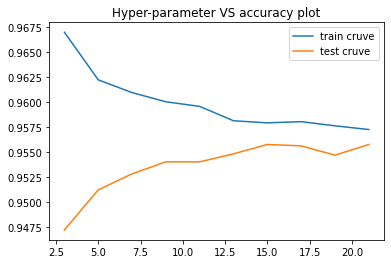

In [6]:
# k = 10 , param_range = (3,51)
train_score_10_fold , test_score_10_fold, params = RandomSearchCV(X_train, y_train, neigh, (3,51), 10)
print('params', params)
print('train_score_10_fold', train_score_10_fold)
print('test_score_10_fold', test_score_10_fold)
plt.plot(params, train_score_10_fold, label='train cruve')
plt.plot(params, test_score_10_fold, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

k = 21 seems suitable since gap between CV and Train accuracy curves is minimum around this K value

In [7]:
# reference : KNN assignment reference notebook 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

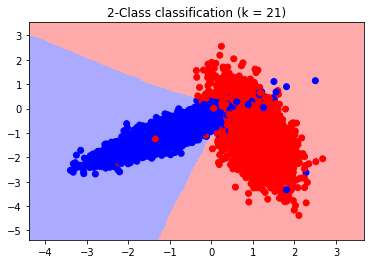

In [8]:
# plotting decision boundary
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 21)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)